In [1]:
import os
import time
import requests
import spotipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
from pathlib import Path
from requests.auth import HTTPBasicAuth
from client import client_id, client_secret

In [2]:
rootdir = Path('Top Country CSV')

# C:/Users/Chris/Desktop/Project 1/

file_list = [f for f in rootdir.glob("*.csv") if f.is_file()]

In [3]:
token_url = "https://accounts.spotify.com/api/token"
headers = {'content-type': 'application/x-www-form-urlencoded'}

token_params = {"grant_type" : "client_credentials"}

token_json = requests.post(token_url, params = token_params, headers = headers, auth = (client_id, client_secret)).json()
token = token_json['access_token']

In [4]:
token_headers = {'authorization': f"Bearer {token}"}

country = []
pop_popularity = []
rap_popularity = []
trap_popularity = []
other_popularity = []

search_artist_url = "https://api.spotify.com/v1/artists/"

for file in file_list:
    country_name = str(file).split("\\")[-1].split("_")[0]
    country.append(country_name)
          
    excel_df = pd.read_csv(file)
    
    pop_popularity.append(0)
    rap_popularity.append(0)
    trap_popularity.append(0)
    other_popularity.append(0)
    
    for artist_id in excel_df["Artist ID"]:
        artist_url = search_artist_url + artist_id
        
        time.sleep(0.005)
        
        try:
            artist_json = requests.get(artist_url, headers = token_headers).json()
            genres = artist_json["genres"]
            
            if "pop" and "rap" and "trap music" in genres:
                pop_popularity[country.index(country_name)] += 1
                rap_popularity[country.index(country_name)] += 1
                trap_popularity[country.index(country_name)] += 1
                
            elif "pop" and "rap" in genres:
                pop_popularity[country.index(country_name)] += 1
                rap_popularity[country.index(country_name)] += 1
                
            elif "pop" and "trap music" in genres:
                pop_popularity[country.index(country_name)] += 1
                trap_popularity[country.index(country_name)] += 1
            
            elif "rap" and "trap music" in genres:
                rap_popularity[country.index(country_name)] += 1
                trap_popularity[country.index(country_name)] += 1
                
            elif "pop" in genres:
                pop_popularity[country.index(country_name)] += 1
                
            elif "rap" in genres:
                rap_popularity[country.index(country_name)] += 1
                
            elif "trap music" in genres:
                trap_popularity[country.index(country_name)] += 1

            else:
                other_popularity[country.index(country_name)] += 1
                
        except (KeyError, IndexError):
            print(f"Artist ID not working | {artist_id}")

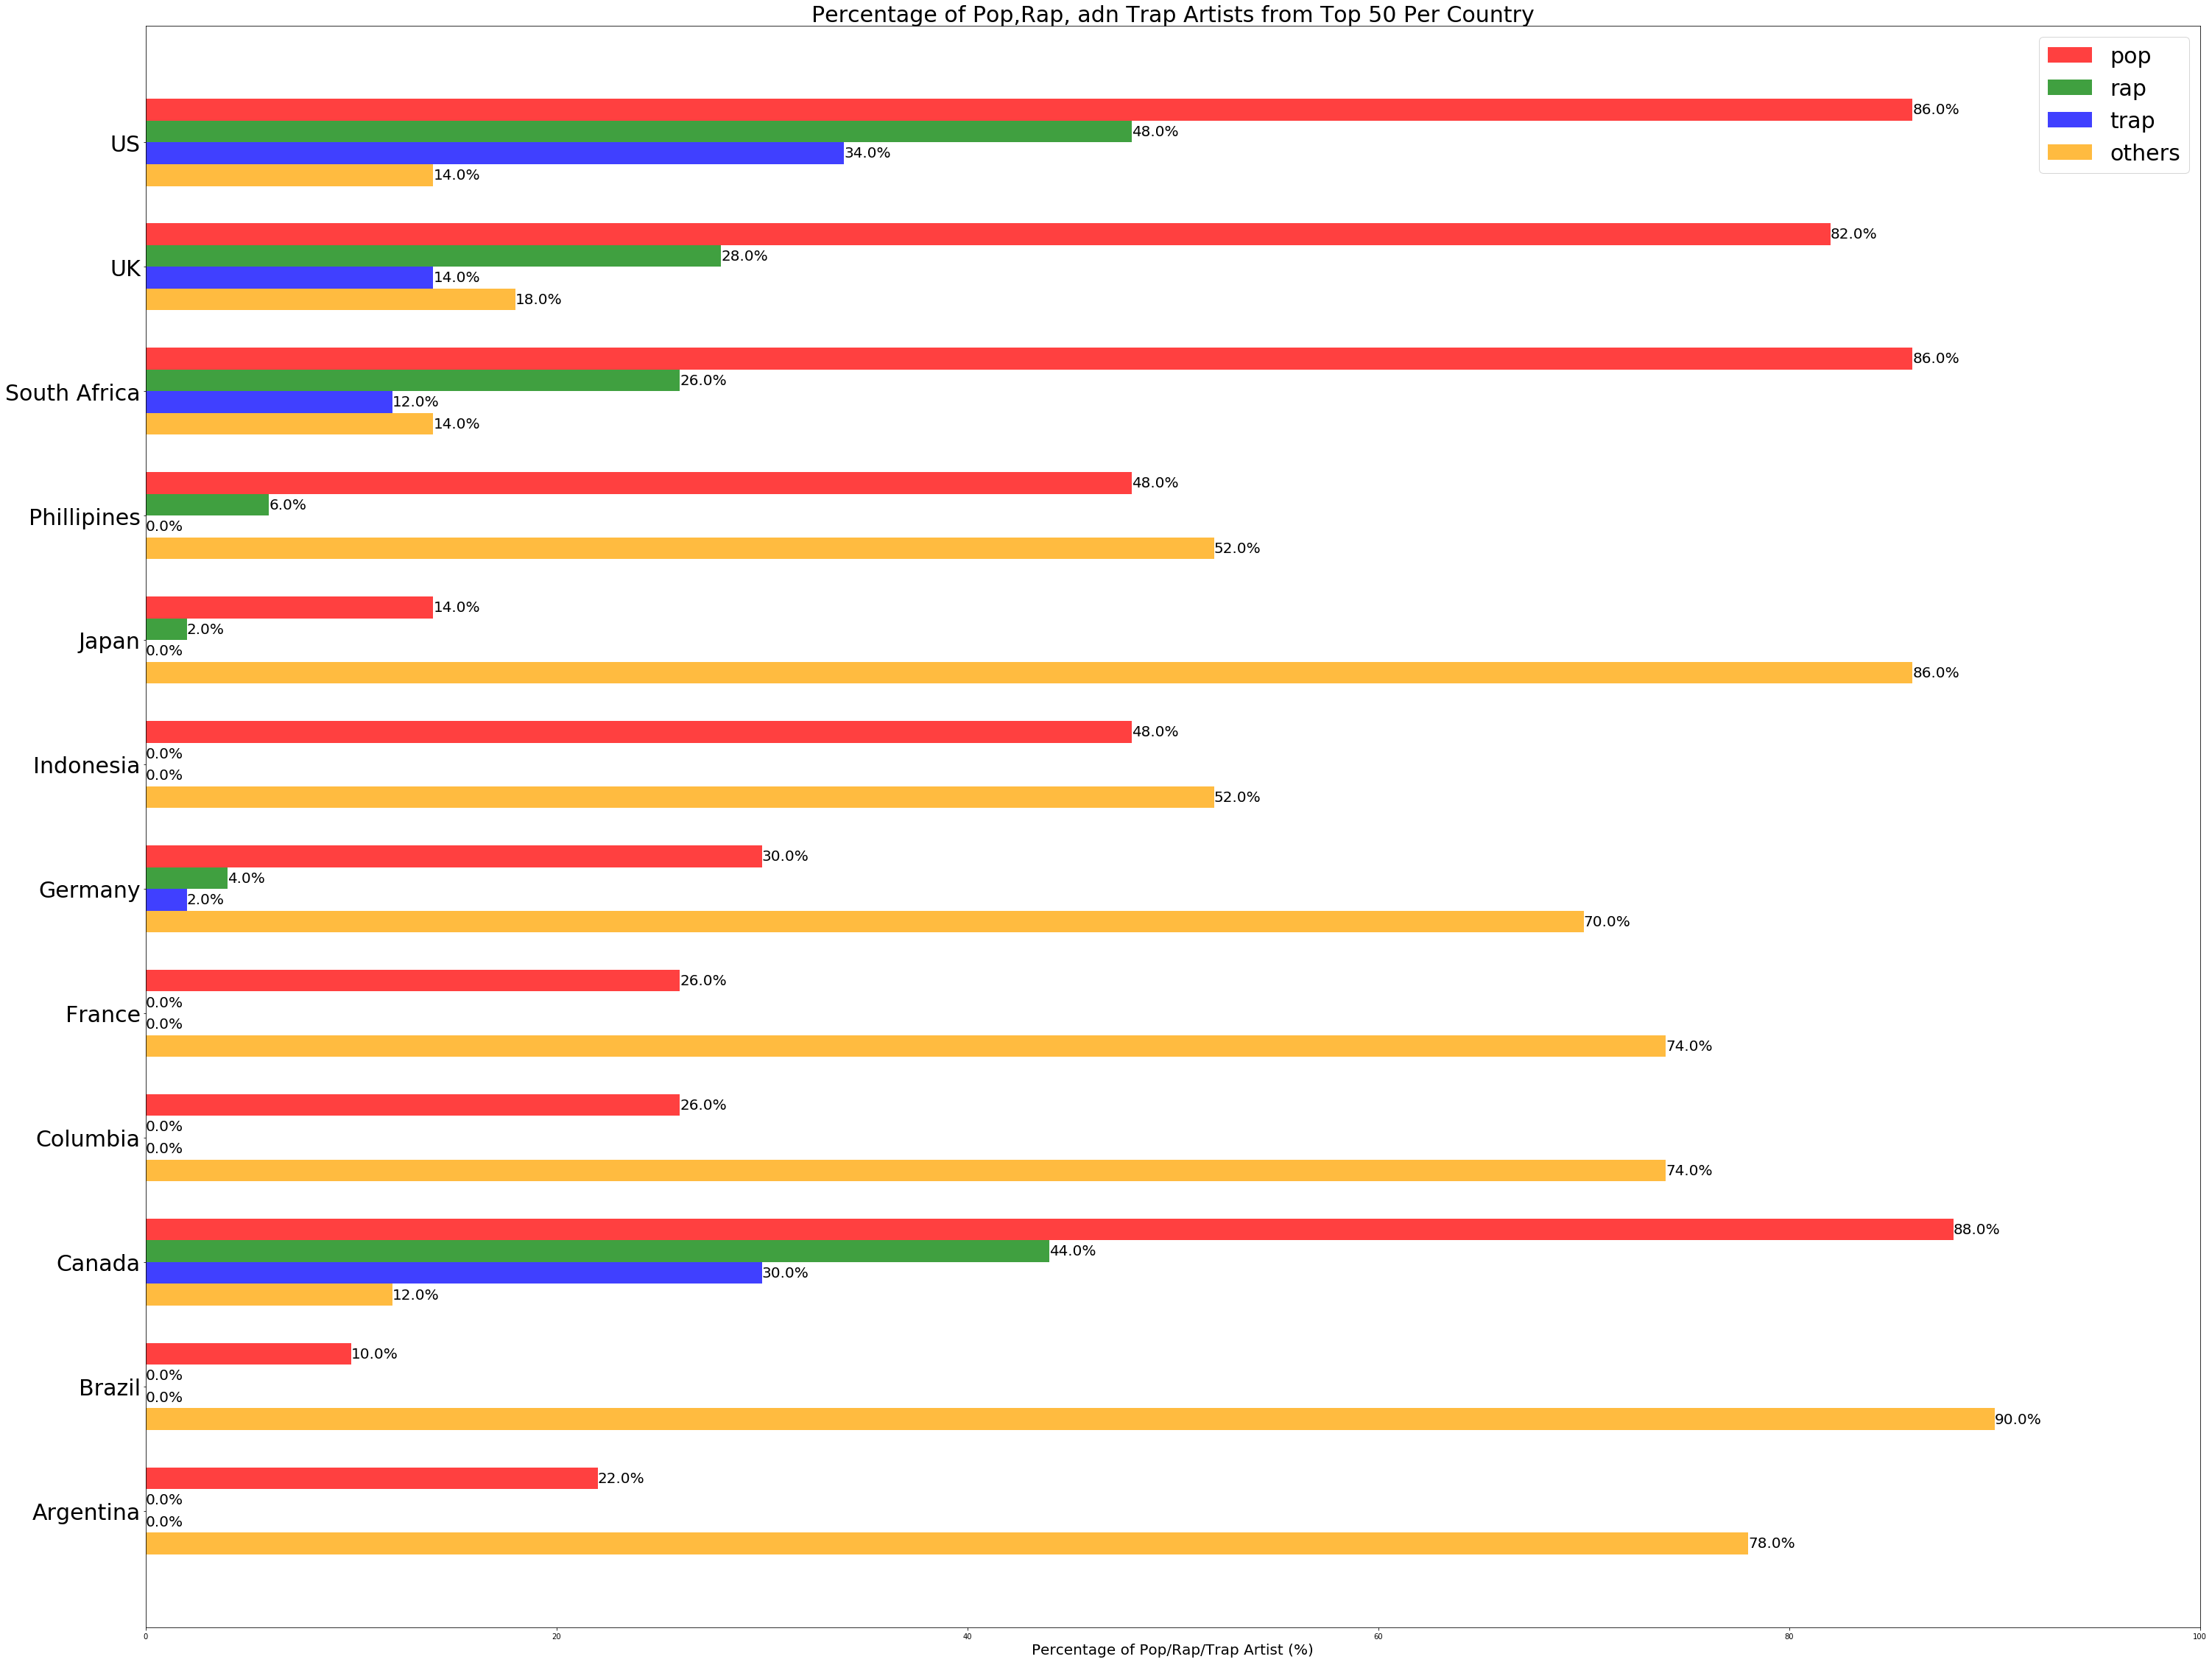

In [7]:
fig, ax = plt.subplots(figsize = (50,40))

y_axis = np.arange(0, len(country) * 4, 4)
width = 0.7

x_axis_pop = (np.array(pop_popularity)/50) * 100
x_axis_rap = (np.array(rap_popularity)/50) * 100
x_axis_trap = (np.array(trap_popularity)/50) * 100
x_axis_other = (np.array(other_popularity)/50) * 100

ax.barh(y_axis + width + width/2, x_axis_pop, width, color = 'r', alpha = 0.75, label = "pop")
ax.barh(y_axis + width/2, x_axis_rap, width, color = 'g', alpha = 0.75, label = "rap")
ax.barh(y_axis - width/2, x_axis_trap, width, color = 'b', alpha = 0.75, label = "trap")
ax.barh(y_axis - width - width/2, x_axis_other, width, color = 'orange', alpha = 0.75, label = "others")

plt.yticks(y_axis, country, Fontsize = 30)
plt.xlim(0,100)
plt.xlabel("Percentage of Pop/Rap/Trap Artist (%)", Fontsize = 20)
plt.title("Percentage of Pop,Rap, adn Trap Artists from Top 50 Per Country", Fontsize = 30)
ax.legend(loc = "best", prop={'size': 30})

rects = ax.patches

for rect in rects:
    box_width = rect.get_height()
    height = rect.get_y() + box_width / 2
    width = rect.get_width()
    
    if width >= 0:
        ax.text(width, height, f'{round(width,2)}%', Fontsize = 20, ha = 'left', va = 'center')
    else:
        ax.text(width, height, f'{round(width,2)}%', Fontsize = 20, ha = 'right', va = 'center')

plt.show()